<a href="https://colab.research.google.com/github/goulartsursula/disciplinas-uerj/blob/master/Estrutura%20da%20Materia%202/Interferometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

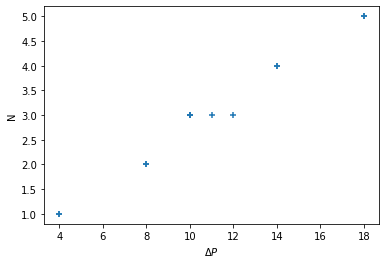

y = (0.28851174934725826 +- 0.012125732800444102)x +( -0.12924281984333996 +- 0.14128910455238902)


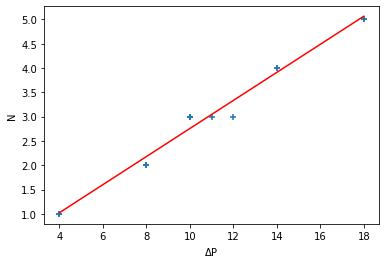

Estimativa n_ar: (1.0002312556309834, 0.00011164603577268354)
Discrepancia: 0.24054262918870883
Erro relativo: 0.011162022296759068


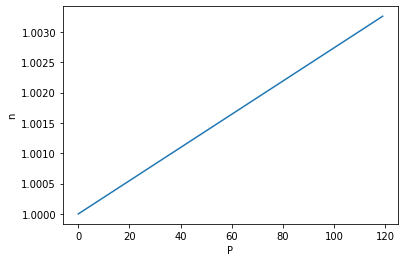

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Dados_VelocidadeDaLuz.dat', sep='\s+')
data['DeltaP'] = data['Pf'] - data['Pi']
data.head(13)

#Gráfico DeltaP x N

plt.scatter(data['DeltaP'], data['N'], marker='+')
plt.xlabel('$\Delta P$')
plt.ylabel('N')

plt.show()

x = data['DeltaP']
y = data['N']

#Ajuste Linear

def lsq_sq(x, y):  
  n = np.size(x)
  mx, my = np.mean(x), np.mean(y)

  cov = np.mean(x * y) - mx * my
  var = np.var(x)

  a = cov/var
  b = my - a *mx

  ey = np.sqrt(np.sum(np.power(y - (a * x + b),2) / (n - 2)))
  
  erro_a = ey / (np.sqrt(var) * np.sqrt(n))
  erro_b = erro_a * np.sqrt(np.mean(np.power(x, 2)))

  print(f'y = ({a} +- {erro_a})x +' + f'( {b} +- {erro_b})')
  return a, erro_a, b, erro_b

parametros = lsq_sq(x, y)


#Gráfico do Ajuste Linear

x = np.arange(data['DeltaP'].values.min(), data['DeltaP'].values.max()+1)
y = parametros[2] + parametros[0] * x

plt.scatter(data['DeltaP'], data['N'], marker='+')
plt.plot(x, y, color='red')
plt.ylabel('N')
plt.xlabel('$\Delta$P')

plt.show()

#Definindo constantes

lamb = 632.8e-7
m = parametros[0]
erro_m = parametros[1]
d = 3

# Estimativa de beta
beta = lamb*m/2*d
erro_beta = beta * (np.sqrt(np.power((erro_m/m),2)+np.power((0.1/d),2)))

# Gráfico n x P: Mostrar que a relação entre n e P é uma relação linear
P = np.arange(0, 120)
n = beta * P + 1

plt.plot(P, n)
plt.ylabel('n')
plt.xlabel('P')

# Estimativa indice de refração do ar
n_ar = (m*lamb*76 / (2*d) + 1, erro_beta * 76)
print('Estimativa n_ar:', n_ar)

#Discrepancia
disc = np.abs(n_ar[0] - 1.0002044)/n_ar[1]
print('Discrepancia:', disc)

#Erro relativo
print('Erro relativo:', (n_ar[1]/n_ar[0])*100)
